In [159]:
from scipy import linalg
from scipy import interpolate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [163]:
f = lambda x: np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)
x_array = [np.array([1.0, 15.0]), np.array([1.0, 8.0, 15.]), np.array([1., 4., 10., 15.])]
f_array = [f(x) for x in x_array]
print x_array
print f_array


[array([  1.,  15.]), array([  1.,   8.,  15.]), array([  1.,   4.,  10.,  15.])]
[array([ 3.25221687,  0.63522142]), array([ 3.25221687,  2.31617016,  0.63522142]), array([ 3.25221687,  1.74684595,  2.50541641,  0.63522142])]


In [164]:
A_array, b_array = [], []
for x_vals, f_vals in zip(x_array, f_array):
    size = len(x_vals)
    left_part = np.array([[xi**pos for pos in range(size) ] for xi in x_vals])
    right_part = f_vals.reshape(size, 1)
    print left_part
    print right_part
    A_array.append(left_part)
    b_array.append(right_part)

[[  1.   1.]
 [  1.  15.]]
[[ 3.25221687]
 [ 0.63522142]]
[[   1.    1.    1.]
 [   1.    8.   64.]
 [   1.   15.  225.]]
[[ 3.25221687]
 [ 2.31617016]
 [ 0.63522142]]
[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.00000000e+00   1.60000000e+01   6.40000000e+01]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.50000000e+01   2.25000000e+02   3.37500000e+03]]
[[ 3.25221687]
 [ 1.74684595]
 [ 2.50541641]
 [ 0.63522142]]


In [165]:
w_array = []
for left, right in zip(A_array, b_array):
    solution = linalg.solve(left, right)
#     print left
    print right
#     print solution
    print left.dot(solution)
    w_array.append(solution)

[[ 3.25221687]
 [ 0.63522142]]
[[ 3.25221687]
 [ 0.63522142]]
[[ 3.25221687]
 [ 2.31617016]
 [ 0.63522142]]
[[ 3.25221687]
 [ 2.31617016]
 [ 0.63522142]]
[[ 3.25221687]
 [ 1.74684595]
 [ 2.50541641]
 [ 0.63522142]]
[[ 3.25221687]
 [ 1.74684595]
 [ 2.50541641]
 [ 0.63522142]]


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]
[ 3.25221687  2.31503384  1.87783842  1.74684595  1.7977761   1.94722128
  2.13543898  2.31617016  2.45082365  2.50541641  2.44929128  2.2550105
  1.89904466  1.36300335  0.63522142]
[ 3.25221687  3.06528862  2.87836037  2.69143213  2.50450388  2.31757563
  2.13064739  1.94371914  1.7567909   1.56986265  1.3829344   1.19600616
  1.00907791  0.82214967  0.63522142]
[ 3.25221687  3.16410215  3.06078536  2.94226649  2.80854553  2.65962249
  2.49549736  2.31617016  2.12164087  1.9119095   1.68697605  1.44684052
  1.1915029   0.9209632   0.63522142]
[ 3.25221687  2.47905198  1.99373298  1.74684595  1.68897699  1.77071218
  1.94263763  2.15533942  2.35940365  2.50541641  2.54396379  2.42563189
  2.1010068   1.52067461  0.63522142]


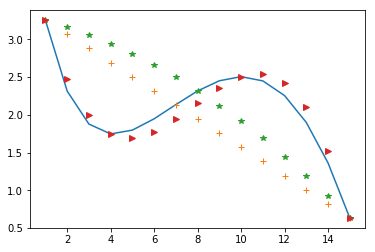

In [166]:
x0 = np.arange(1, 15.5, 1)
y0 = f(x0)
y1 = w_array[0][0] + w_array[0][1]*x0
y2 = w_array[1][0] + w_array[1][1]*x0 + w_array[1][2]*x0**2
y3 = w_array[2][0] + w_array[2][1]*x0 + w_array[2][2]*x0**2 + w_array[2][3]*x0**3
print x0
print y0
# print w_array[0][0], w_array[0][1]
print y1
print y2
print y3
plt.plot(
    x0, y0, '-',
    x0, y1, '+',
    x0, y2, '*',
    x0, y3, '>',
)

In [187]:
print w_array[2]
print w_array[2][0]
with open('submission-2.txt', 'w') as res_file:
    res_file.write(" ".join([str(w_array[2][row][0]) for row in range(4)]))

[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]
[ 4.36264154]


In [188]:
!cat submission-2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332

In [189]:
!cat submission-1.txt

6 4